# Classification of Call Case Status

### Install plotnine

In [1]:
! pip install plotnine[all]

### Import packages

In [2]:
import re
import pandas as pd
from pathlib import Path

from plotnine import *

pd.set_option("display.max_columns", None)

__author__ = "Justice Agbadu"
__email__ = "justice.agbadu@aims-cameroon.org"

### Load and merge the CSV files

In [3]:
data_dir = Path("data")
calls = pd.concat([pd.read_csv(f, low_memory=False) for f in data_dir.glob("*.csv")])
calls.shape

(55445, 119)

### Clean the column names

In [4]:
pattern = re.compile("[a-z]+")
calls.columns = ["_".join(pattern.findall(c.lower())) for c in calls.columns]

### Parse the data columns

In [5]:
date_columns = ["call_date",
                "patient_status_date_of_death",
                "patient_symptoms_date_of_first_symptoms",
                "dispatch_date",
                "burial_corpse_collected"
               ]

for c in date_columns:
    calls[c] = pd.to_datetime(calls[c], errors='coerce')

In [6]:
calls.head()


calls['call_response_line'].unique()

array([117, '117', 'Port Loko District', 'Tonkolili District',
       'Bo District', 'Kambia District', 'Moyamba District',
       'Bombali District', 'Kono District', 'Bonthe District',
       'Kenema District', 'Koinadugu District'], dtype=object)

In [7]:
calls['call_type_of_health_info_symptoms'].unique()

array([nan, True, False], dtype=object)

In [8]:
calls[ (calls['call_case_status'] == 'cleared') & (calls['call_nature'] == 'death')].head(50)
fields_to_drop = 'patient_has_residence_location burial_assigned_date call_is_outbound call_type_of_health_info_details call_other_type call_created_by call_case_id call_details caller_address caller_address_region_id caller_address_region_name caller_address_district_id caller_address_district_name caller_longitude_district_lon caller_latitude_district_lat caller_address_chiefdom_id caller_address_chiefdom_name caller_longitude_chiefdom_lon caller_latitude_chiefdom_lat caller_phone caller_other_phone patient_id patient_address patient_longitude_district_lon patient_latitude_district_lat patient_longitude_chiefdom_lon patient_latitude_chiefdom_lat patient_phone patient_family_phone patient_status_date_of_death patient_status_time_of_death patient_health_facility_of_death dispatch_zone dispatch_team dispatch_phone dispatch_date response_dso_phone response_position response_date_of_visit response_outcome response_dso_feedback burial_corpse_collected burial_swab_id burial_grave_location quarantine_officer quarantine_phone quarantine_date_responded quarantine_action_taken call_comments dispatched dso_response dso_followup dso_cleared duplicate patient_residence_district_name patient_address_region_name patient_address_district_name patient_address_chiefdom_name patient_address_section_name patient_residence_region_name patient_residence_district_name patient_residence_chiefdom_name patient_residence_section_name call_type_of_health_info_symptoms call_type_of_health_info_prevention call_type_of_health_info_rumors call_type_of_health_info_caring_for_sick_person	call_type_of_health_info_burials call_type_of_health_info_quarantine call_type_of_health_info_other	call_other_type caller_age_years patient_age_years patient_age_months patient_age_days patient_household_child_ren patient_household_disabledperson patient_household_pregnantwoman patient_address_ward patient_address_community patient_address_section_id patient_residence_section_id patient_residence_ward patient_residence_community patient_residence_address patient_symptoms_date_of_first_symptoms call_date patient_symptoms_other patient_residence_region_id patient_additional_information caller_gender'.split()
fields_to_drop

['patient_has_residence_location',
 'burial_assigned_date',
 'call_is_outbound',
 'call_type_of_health_info_details',
 'call_other_type',
 'call_created_by',
 'call_case_id',
 'call_details',
 'caller_address',
 'caller_address_region_id',
 'caller_address_region_name',
 'caller_address_district_id',
 'caller_address_district_name',
 'caller_longitude_district_lon',
 'caller_latitude_district_lat',
 'caller_address_chiefdom_id',
 'caller_address_chiefdom_name',
 'caller_longitude_chiefdom_lon',
 'caller_latitude_chiefdom_lat',
 'caller_phone',
 'caller_other_phone',
 'patient_id',
 'patient_address',
 'patient_longitude_district_lon',
 'patient_latitude_district_lat',
 'patient_longitude_chiefdom_lon',
 'patient_latitude_chiefdom_lat',
 'patient_phone',
 'patient_family_phone',
 'patient_status_date_of_death',
 'patient_status_time_of_death',
 'patient_health_facility_of_death',
 'dispatch_zone',
 'dispatch_team',
 'dispatch_phone',
 'dispatch_date',
 'response_dso_phone',
 'response_p

In [9]:
calls2 = calls.drop(fields_to_drop, axis=1)
calls2[calls2['caller_type'] == 'child'][['caller_type']].head(100)
calls2.caller_type.loc[calls2['caller_type'].isnull()] = 'adult'
calls2.head(10)

C:\Users\Justice.Agbadu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,call_response_line,call_case_status,call_nature,caller_category,caller_type,patient_age_group,patient_gender,patient_address_region_id,patient_address_district_id,patient_address_chiefdom_id,patient_residence_district_id,patient_residence_chiefdom_id,patient_status_patient_status,patient_symptoms_abdominal_pain,patient_symptoms_bleeding,patient_symptoms_diarrhea,patient_symptoms_difficulty_swallowing,patient_symptoms_fever,patient_symptoms_headache,patient_symptoms_hiccup,patient_symptoms_muscle_or_joint_pain,patient_symptoms_rash,patient_symptoms_vomiting,patient_symptoms_weakness,patient_cause_of_death,patient_place_of_death,patient_exposure_dead_person,patient_exposure_sick_person,patient_exposure_health_worker,patient_exposure_quarantine
0,117,open,other,Public - Family,adult,25 years and older,F,E,12.0,12-12,NaN,NaN,dead,False,False,False,False,False,False,False,False,False,False,False,unexplained,Health Facility,NaN,NaN,NaN,NaN
0,117,dispatch,death,Public - Family,adult,12-59 months,M,W,32.0,32-03,NaN,NaN,dead,False,False,False,False,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,117,close,death,Health Worker (not a DSO),adult,25 years and older,M,N,23.0,23-09,NaN,NaN,dead,False,False,False,False,True,False,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN
2,Port Loko District,dispatch,death,Public - Community member/neighbor etc,adult,12-59 months,F,N,24.0,24-07,NaN,NaN,dead,False,False,False,False,True,False,False,False,True,True,True,NaN,NaN,True,NaN,NaN,NaN
3,117,close,death,Health Worker (not a DSO),adult,12-59 months,F,N,23.0,23-05,NaN,NaN,dead,False,False,False,False,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,117,close,death,Health Worker (not a DSO),adult,25 years and older,M,N,23.0,23-05,NaN,NaN,dead,False,False,False,False,False,False,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
5,117,close,death,Health Worker (not a DSO),adult,5-12 years,M,N,23.0,23-05,NaN,NaN,dead,False,False,False,False,False,False,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
6,117,dispatch,death,Public - Family,adult,adult,F,W,31.0,31-03,NaN,NaN,dead,False,False,True,False,False,False,False,False,False,False,False,NaN,NaN,False,NaN,NaN,NaN
7,117,dispatch,death,Public - Family,adult,0-11 months,F,W,32.0,32-03,NaN,NaN,dead,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
8,117,dispatch,death,Health Worker (not a DSO),adult,25 years and older,M,W,31.0,31-08,NaN,NaN,dead,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN


### Inspect the type of all the columns

In [10]:
for c, d in calls2.dtypes.reset_index().values:
    print(f"{c}: {d}")

call_response_line: object
call_case_status: object
call_nature: object
caller_category: object
caller_type: object
patient_age_group: object
patient_gender: object
patient_address_region_id: object
patient_address_district_id: float64
patient_address_chiefdom_id: object
patient_residence_district_id: float64
patient_residence_chiefdom_id: object
patient_status_patient_status: object
patient_symptoms_abdominal_pain: object
patient_symptoms_bleeding: object
patient_symptoms_diarrhea: object
patient_symptoms_difficulty_swallowing: object
patient_symptoms_fever: object
patient_symptoms_headache: object
patient_symptoms_hiccup: object
patient_symptoms_muscle_or_joint_pain: object
patient_symptoms_rash: object
patient_symptoms_vomiting: object
patient_symptoms_weakness: object
patient_cause_of_death: object
patient_place_of_death: object
patient_exposure_dead_person: object
patient_exposure_sick_person: object
patient_exposure_health_worker: object
patient_exposure_quarantine: object


### An example bar chart

In [11]:
import matplotlib.pyplot as plt

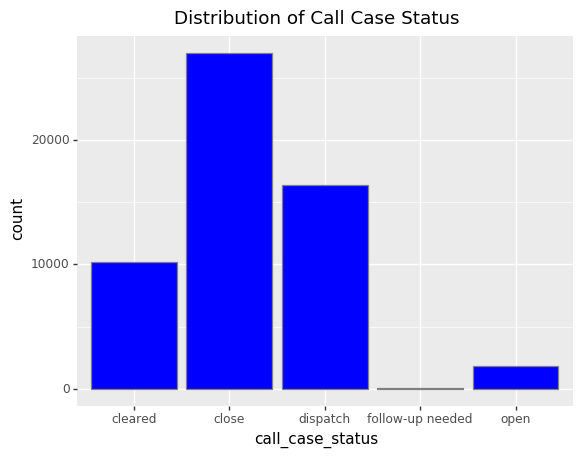

<ggplot: (-9223371901712227966)>


In [12]:
call_case = ggplot(calls2,aes("call_case_status")) +\
geom_bar(colour='gray',fill="blue")
print(call_case + ggtitle("Distribution of Call Case Status"))
#plt.savefig('call_case_status.png')

In [13]:
calls2.shape

(55445, 30)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold

pd.set_option("display.max_columns", 0)

In [15]:
calls2.drop(calls2[calls2.patient_exposure_health_worker == '117'].index, inplace=True)

In [16]:
categorical_features = 'call_nature	caller_category	caller_type	patient_age_group	patient_gender	patient_address_region_id	patient_address_district_id	patient_address_chiefdom_id	patient_residence_district_id	patient_residence_chiefdom_id	patient_status_patient_status	patient_symptoms_abdominal_pain	patient_symptoms_bleeding	patient_symptoms_diarrhea	patient_symptoms_difficulty_swallowing	patient_symptoms_fever	patient_symptoms_headache	patient_symptoms_hiccup	patient_symptoms_muscle_or_joint_pain	patient_symptoms_rash	patient_symptoms_vomiting	patient_symptoms_weakness	patient_cause_of_death	patient_place_of_death	patient_exposure_dead_person	patient_exposure_sick_person	patient_exposure_health_worker	patient_exposure_quarantine'.split()
#categorical_features = 'call_nature'.split()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [17]:
#calls2[calls2['call_response_line'] == 117] = '117'

In [18]:
X = calls2.drop('call_case_status', axis=1)

In [19]:
pd.DataFrame(preprocessor.fit_transform(X).todense())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
55441,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
55442,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
55443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [20]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [21]:
clf.fit(X, calls2['call_case_status'].values)

C:\Users\Justice.Agbadu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value='missing', missing_values=nan,
       strategy='most_freq...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [22]:
y = calls2['call_case_status']

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2)

In [23]:
params = {'classifier__n_estimators': [1, 10, 100]}

In [27]:
rskfcv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5)

In [28]:
gs = GridSearchCV(clf, param_grid=params, cv=rskfcv, return_train_score=True)

In [29]:
gs.fit(X_train, y_train)

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000001F700179CC0>,
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value='missing', missing_values=nan,
       strategy='most_freq...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'classifier__n_estimators': [1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [30]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,split15_train_score,split16_train_score,split17_train_score,split18_train_score,split19_train_score,split20_train_score,split21_train_score,split22_train_score,split23_train_score,split24_train_score,mean_train_score,std_train_score
0,6.679604,0.520525,0.190542,0.033740,1,{'classifier__n_estimators': 1},0.647317,0.645627,0.648856,0.643107,0.652086,0.646416,0.654869,0.653590,0.641078,0.647012,0.644612,0.643147,0.646827,0.653816,0.649605,0.643598,0.648783,0.651449,0.654492,0.643743,0.644274,0.654193,0.644459,0.646489,0.643179,0.647705,0.004149,3,0.774377,0.775871,0.777004,0.777624,0.780308,0.776040,0.778210,0.775426,0.776835,0.774587,0.778154,0.776829,0.778132,0.774863,0.774503,0.775533,0.774884,0.775285,0.774412,0.778899,0.778013,0.776575,0.777568,0.776018,0.777349,0.776532,0.001558
1,20.637531,0.522514,0.228291,0.025378,10,{'classifier__n_estimators': 10},0.688683,0.684851,0.689663,0.688085,0.682413,0.691727,0.684851,0.683576,0.682110,0.688952,0.685077,0.682935,0.680983,0.692368,0.694138,0.686091,0.693981,0.687070,0.693608,0.685006,0.685302,0.683386,0.684928,0.693721,0.686697,0.687208,0.004005,2,0.836039,0.835306,0.836184,0.837847,0.837598,0.836715,0.838519,0.837368,0.835480,0.836161,0.836462,0.837279,0.837847,0.836212,0.835766,0.839054,0.835391,0.836776,0.834832,0.836527,0.837110,0.837420,0.837424,0.835677,0.835259,0.836650,0.001062
2,162.648627,3.215068,0.745042,0.038379,100,{'classifier__n_estimators': 100},0.700631,0.699166,0.696652,0.691805,0.692897,0.692967,0.694770,0.696539,0.695074,0.699775,0.694770,0.696010,0.692707,0.701725,0.701691,0.696010,0.701307,0.691692,0.703754,0.691319,0.694657,0.697024,0.690790,0.704430,0.697407,0.696623,0.003924,1,0.842098,0.841393,0.841510,0.843709,0.843459,0.841929,0.843873,0.843568,0.841905,0.841994,0.842915,0.842661,0.843089,0.841257,0.841430,0.843930,0.841506,0.842130,0.841341,0.842417,0.842492,0.842887,0.842891,0.841623,0.841769,0.842391,0.000843


In [31]:
gs.best_estimator_

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value='missing', missing_values=nan,
       strategy='most_freq...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [32]:
import numpy as np
np.mean(gs.best_estimator_.predict(X_validate) == y_validate)

0.7005140229055821

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
con_mat = confusion_matrix(y_validate, gs.best_estimator_.predict(X_validate))

In [35]:
con_mat

array([[ 857,  833,  308,    0,    7],
       [ 547, 4155,  658,    1,   16],
       [ 126,  437, 2726,    0,   45],
       [   3,    6,    1,    8,    0],
       [   0,   56,  277,    0,   22]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix')

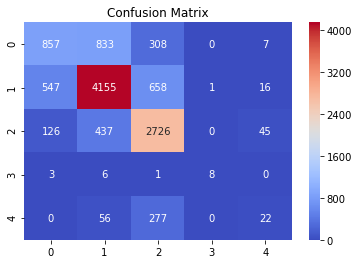

In [36]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(con_mat, cmap="coolwarm", annot=True, fmt='')

ax.set_title('Confusion Matrix')

In [37]:
classification_report(y_validate, gs.best_estimator_.predict(X_validate))

'                  precision    recall  f1-score   support\n\n         cleared       0.56      0.43      0.48      2005\n           close       0.76      0.77      0.76      5377\n        dispatch       0.69      0.82      0.75      3334\nfollow-up needed       0.89      0.44      0.59        18\n            open       0.24      0.06      0.10       355\n\n       micro avg       0.70      0.70      0.70     11089\n       macro avg       0.63      0.50      0.54     11089\n    weighted avg       0.68      0.70      0.69     11089\n'